In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [63]:
#read in csv file
df1 = pd.read_csv('benchmark_knl_mpi1.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','size']+list(memops.keys())]
dfr[(dfr['n']==4) & (dfr['Nx']==2048)]

,n,Nx,Ny,size,arakawa,dot,dy,dx,cg,pointwiseDot,scal,axpby
23,4,2048,2048,536.87,58.90,140.21,19.19,207.65,72.28,402.37,350.86,454.66
55,4,2048,2048,536.87,54.77,141.30,19.00,209.48,73.17,398.11,351.02,458.04
87,4,2048,2048,536.87,62.10,141.44,15.00,207.49,71.95,412.75,352.77,436.71
119,4,2048,2048,536.87,60.77,142.09,20.05,209.37,72.07,409.62,354.74,442.25
151,4,2048,2048,536.87,61.65,143.58,17.96,208.90,73.10,408.21,358.95,458.24
183,4,2048,2048,536.87,56.64,143.45,19.42,206.78,72.15,403.45,358.19,443.31
215,4,2048,2048,536.87,62.51,143.28,18.48,190.10,71.09,398.26,345.98,460.02
247,4,2048,2048,536.87,60.07,142.27,19.07,208.82,71.51,419.38,353.58,464.77
279,4,2048,2048,536.87,61.01,142.29,17.29,174.61,72.62,395.46,347.24,436.00
311,4,2048,2048,536.87,62.51,142.91,18.69,207.13,72.24,403.66,351.38,457.56


In [61]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [62]:
dfr['axpby']

,mean,std
0,100.72,42.46
1,388.26,41.04
2,655.85,128.24
3,778.49,215.54
4,590.86,77.95
5,420.86,30.00
6,430.65,69.69
7,462.74,9.49
8,253.33,37.10
9,711.15,32.34


In [43]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [44]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [45]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
efficiency.iloc[0:8]

,n,Nx,Ny,size,arakawa,dot,dy,dx,cg,pointwiseDot,scal,axpby,arakawa,dot,dy,dx,cg,pointwiseDot,scal,axpby
,,,,,eff,eff,eff,eff,eff,eff,eff,eff,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err,eff_err
0,2,128,128,0.52,0.04,0.01,0.01,0.06,0.03,0.27,0.08,0.09,1.33e-03,5.26e-04,3.10e-04,0.02,7.53e-03,0.09,0.03,0.05
8,3,128,128,1.18,0.07,0.03,0.03,0.10,0.06,0.58,0.19,0.25,1.17e-03,7.56e-04,5.43e-04,0.04,9.44e-04,0.09,0.02,0.07
1,2,256,256,2.10,0.12,0.04,0.05,0.20,0.11,0.97,0.29,0.48,2.67e-03,1.46e-03,1.21e-03,0.02,3.63e-03,0.02,0.09,0.08
16,4,128,128,2.10,0.10,0.04,0.04,0.13,0.09,0.95,0.30,0.47,2.68e-03,1.24e-03,1.31e-03,0.05,3.50e-03,0.02,0.10,0.06
24,5,128,128,3.28,0.10,0.06,0.04,0.15,0.10,1.25,0.50,0.63,1.34e-03,1.30e-03,2.09e-03,0.06,2.09e-03,0.18,0.04,0.13
2,2,384,384,4.72,0.19,0.08,0.09,0.33,0.17,1.61,0.57,0.94,2.83e-03,1.68e-03,1.62e-03,0.02,4.38e-03,0.03,0.21,0.06
9,3,256,256,4.72,0.16,0.08,0.07,0.25,0.15,1.60,0.56,0.78,2.57e-03,4.08e-03,3.59e-03,0.03,2.42e-03,0.05,0.17,0.25
3,2,512,512,8.39,0.22,0.12,0.13,0.39,0.21,2.09,0.88,1.44,7.40e-03,8.72e-03,5.22e-03,0.04,3.21e-03,0.06,0.26,0.04


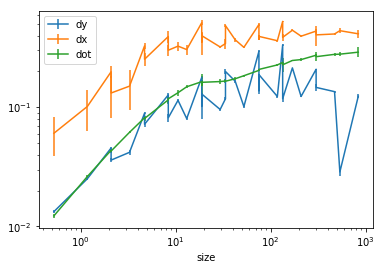

In [46]:
fig=plt.figure()
ax = efficiency['dy'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err')
ax = efficiency['dx'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
ax = efficiency['dot'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

/home/matthias/.local/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


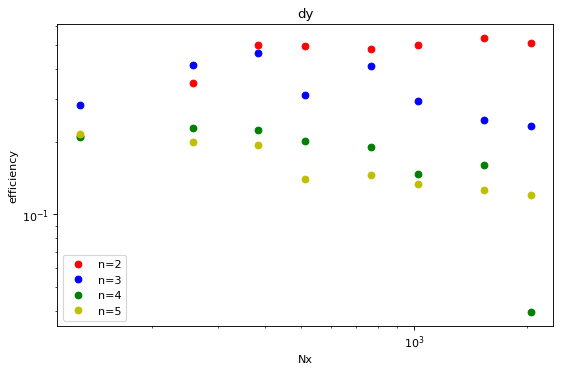

468.02565621845713

In [39]:
fig,ax=plt.subplots(1,1,figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
efficiency[efficiency['n']==2].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency[efficiency['n']==3].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency[efficiency['n']==4].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency[efficiency['n']==5].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title(plotlist[0][0])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('efficiency')
plt.xlabel('Nx')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
base_bandwidth